In [1]:
import os
from torch.utils.data import DataLoader
from data.loaders import SteelLoader, SegmentationMnistDataset
from tqdm.auto import tqdm
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import seaborn_image as isns

/home/011/e/ec/ecj200000/.local/lib/python3.6/site-packages/paramiko/transport.py:32: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography (40.0) will be the last to support Python 3.6.
  from cryptography.hazmat.backends import default_backend


In [2]:
n_class = 5
class_names = ["1", "2", "3", "4", "No digit"]
dataname = "Steel"

In [3]:
loader = SteelLoader(False)

In [4]:
# mnist 1, 
specific_item_ind = 7
specific_item = loader.dataset[specific_item_ind]

In [5]:
counts = np.zeros(n_class)
classes_represented = np.zeros(n_class)

In [6]:
for x, y, in loader:
    x = np.array(x)
    y = np.array(y)

    y_n_classes_represented = np.count_nonzero(np.sum(y, (2, 3))[:,:-1], axis = 1)
    for i in y_n_classes_represented:
        classes_represented[int(i)] += 1

    for i in range(n_class):
        counts[i] += np.sum(y[:, i])

In [7]:
counts_normed = counts / np.sum(counts)

last_nonzero_rep_ind = 0
for i in range(n_class):
    if classes_represented[i] > 0:
        last_nonzero_rep_ind = i

classes_represented = classes_represented[:last_nonzero_rep_ind + 1]

class_representation_normed = classes_represented / np.sum(classes_represented)

In [8]:
print(counts)
print(counts_normed)

[7.46305000e+05 1.79094000e+05 2.76041980e+07 5.63943800e+06
 5.11827765e+08]
[1.36686699e-03 3.28012911e-04 5.05574355e-02 1.03287016e-02
 9.37418983e-01]


In [9]:
print(classes_represented)
print(class_representation_normed)

[   0. 1247.   86.]
[0.         0.93548387 0.06451613]


Plot pixel representation of the classes

In [10]:
detection_colors = matplotlib.cm.get_cmap("rainbow", n_class - 1)
c_list = [detection_colors(i / (n_class - 1)) for i in range(n_class - 1)] + [(0,0,0)] 
class_colors = matplotlib.colors.LinearSegmentedColormap.from_list("class_colors", c_list)
sns_class_colors = sns.color_palette([class_colors(i / (n_class - 1)) for i in range(n_class)])

/home/011/e/ec/ecj200000/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Steel Pixel Class Distribution')

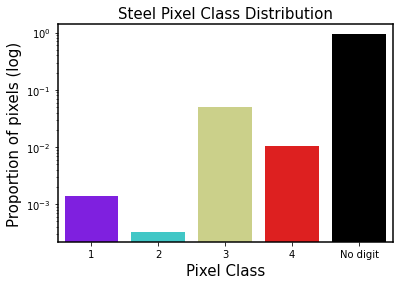

In [11]:
pixel_distr = sns.barplot(class_names,
            counts_normed,
            palette=sns_class_colors)
pixel_distr.set_yscale("log")
pixel_distr.set_xlabel("Pixel Class")
pixel_distr.set_ylabel("Proportion of pixels (log)")
pixel_distr.set_title(f"{dataname} Pixel Class Distribution")

Text(0.5, 1.0, 'Steel Multiple-Class Observations')

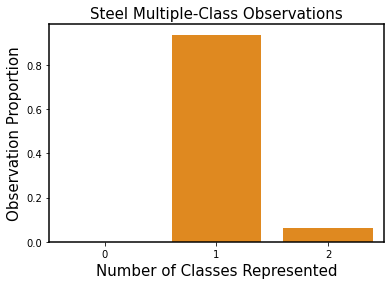

In [12]:
distr_n_represented = sns.barplot(x = [i for i in range(len(classes_represented))],
                                  y = class_representation_normed,
                                  color = "darkorange")
distr_n_represented.set_xlabel("Number of Classes Represented")
distr_n_represented.set_ylabel("Observation Proportion")
distr_n_represented.set_title(f"{dataname} Multiple-Class Observations")

In [13]:
def plot_image(img, title):
    img = np.transpose(img, (1,2, 0))
    iplot = isns.imgplot(img, cmap = "gray", cbar = False, origin="upper")
    iplot.set_title(title)

def plot_classes(img, title):
    class_img = (np.argmax(img, axis = 0)) / (n_class - 1)
    iplot = isns.imgplot(class_img, 
                         cmap = class_colors,
                         vmin = 0, vmax = 1,
                         origin = "upper",
                         cbar = False)
    iplot.set_title(title)


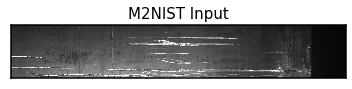

In [14]:
plot_image(specific_item[0], "M2NIST Input")

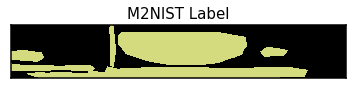

In [15]:
plot_classes(specific_item[1], "M2NIST Label")